In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs; sbs.set()
import tensorflow as tf

import sys
import os

scripts = os.path.abspath('./src/')
if scripts not in sys.path:
    sys.path.append(scripts)    
from data_generator import DataGenerator

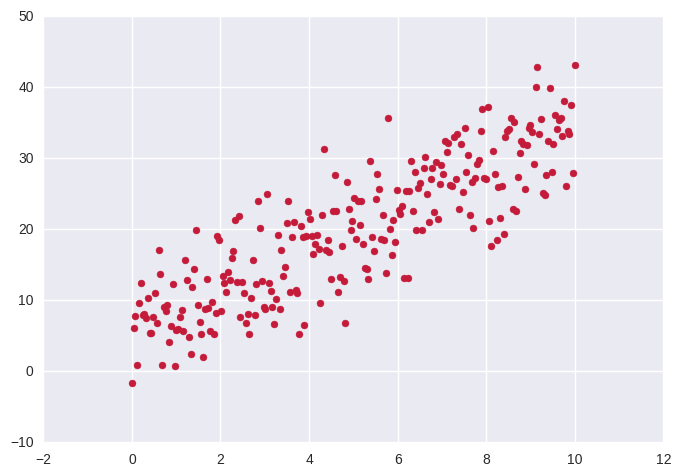

In [2]:
x, y = DataGenerator.linear(lambda x: 3*x + 5, 0, 10, sample_size=250, noise_mean=0, noise_var=5)
plt.scatter(x, y, s=25, color = '#c51b3a')
plt.show()

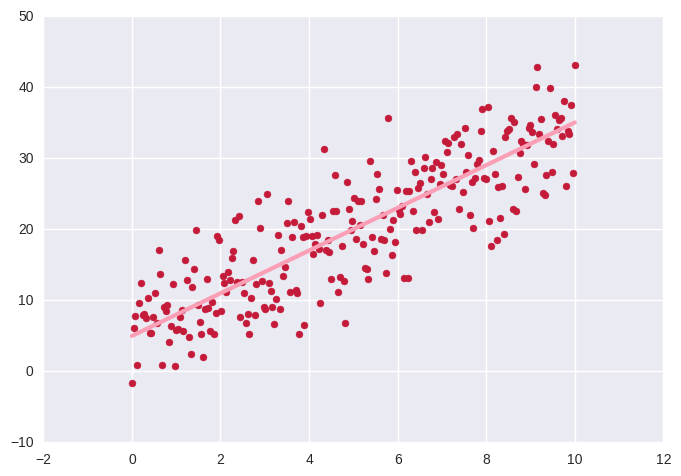

In [7]:
W = tf.Variable(0.0, name='linear_weight')
b = tf.Variable(0.0, name='linear_bias')

X = tf.placeholder('float')
y_p = tf.placeholder('float')

y_actual = 3*x + 5
activation = W*X + b
cost = tf.reduce_mean(tf.square(activation - y_actual))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for i in range(1000):
        _, c, w_hat, b_hat = session.run([optimizer, cost, W, b], feed_dict={X: x, y_p:y_actual})
        #print(w_hat)
        #print('W: {0} b: {1}'.format(session.run(W), session.run(b)))

plt.scatter(x, y, s=25, color='#c51b3a')
plt.plot(x, w_hat*x + b_hat, color='#fa9fb5', linewidth=3)
#plt.show()